# Import Libraries 

In [1]:
#import standard libaries
import pandas as pd
import os 
import numpy as np
from PIL import Image
from sklearn import preprocessing
from pathlib import Path
from sklearn.model_selection import train_test_split

In [10]:
#import ML models and metrics from sklearn library 
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV

In [3]:
# importing learning rate graph libraries 
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import learning_curve
from sklearn import datasets
import matplotlib.pyplot as plt

In [4]:
#import conusion matrix (plot)
from sklearn.metrics import confusion_matrix
from sklearn.metrics import plot_confusion_matrix
import matplotlib.pyplot as plt

# Import Training 

In [5]:

# load x train data
def import_x():
    #get all images from file 
    def get_images(path):
        #create array to store all array from all images 
        all_images_as_array = []
        # for each image in folder 
        for filename in os.listdir(path):
            #open image
            img = Image.open(path+filename)
            #resize image to 64x64
            new_img = img.resize((64, 64))
            #convert image to array 
            np_array = np.asarray(new_img)
            #appenda array to array for all images 
            all_images_as_array.append(np_array)
        # output array for all images 
        return np.array(all_images_as_array)
    # file path to train data - call function 
    x_train = get_images('Datasets\\cartoon_set\\img\\')
    #pre-processing data
    x_train = np.reshape(x_train, (x_train.shape[0], -1))
    #create normalisation scalar
    scaler = preprocessing.StandardScaler().fit(x_train)
    #apply scaler to the raining data 
    x_train_not_split = scaler.transform(x_train)
    #output training data 
    return x_train_not_split

In [6]:
# import y label train
def import_labels():
    #import the csv file 
    dataFrame = pd.read_csv('Datasets\\cartoon_set\\labels.csv',header = None, prefix="data")
    #seperate the data into different coloumns
    dataFrame['data1']= dataFrame['data0'].str.split('\t')
    #rename the titles of the column
    df3 = pd.DataFrame(dataFrame['data1'].to_list(), columns=['image_number','eye color','face shape','file name'])
    #replace -1 with 0
    df3['face shape'] = df3['face shape'].replace(['-1'], '0')
    #alphabatises the image number 
    df3 = df3.sort_values(by ='image_number')
    #remove row zero 
    df3 = df3.drop(0)
    #convert to numerical 
    df3['face shape'] = pd.to_numeric(df3['face shape'])#
    #select the face shape column
    y_train_not_split = df3['face shape']
    #output the y 
    return y_train_not_split

In [7]:
#split data 
def split_data(x,y):
    #split into 80% training and 20% validation
    x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2) 
    #output validation and training set 
    return x_train,x_test,y_train,y_test 


In [34]:
#create the final model
def final_model(x_train, y_train):    
    #load classifier 
    models =LinearSVC(C=1)
    # Fit the classifier
    models.fit(x_train, y_train)
    # print the optimum model 
    print('The optimised model used for B1 is:',models)
    return models 

In [35]:
# import y label test
def import_y_test():
    # import the csv test labels 
    test_dataFrame = pd.read_csv('Datasets\\cartoon_set_test\\labels.csv',header = None, prefix="data")
    #seperate the labels into coloumns
    test_dataFrame['data1']= test_dataFrame['data0'].str.split('\t')
    #labe lthe columns
    test_df3 = pd.DataFrame(test_dataFrame['data1'].to_list(), columns=['image_number','eye color','face shape','file name'])
    #replace the -1 with 0
    test_df3['face shape'] = test_df3['face shape'].replace(['-1'], '0')
    #alphabilie the table so same as the order of images 
    test_df3 = test_df3.sort_values(by ='image_number')
    #remove row 0
    test_df3 = test_df3.drop(0)
    #labels as number 
    test_df3['face shape'] = pd.to_numeric(test_df3['face shape'])
    #select the face shape coulmn
    y_test_test_data = test_df3['face shape']
    #y test output 
    return y_test_test_data

In [36]:
# load x test data 
def import_x_test():
    # get images from file 
    def get_images(path):
        # make array for all the images
        all_images_as_array = []
        # iterate through all the images in the folder 
        for filename in os.listdir(path):
            # open images
            img = Image.open(path+filename)
            #resizze images
            new_img = img.resize((64, 64))
            #make images as array
            np_array = np.asarray(new_img)
            #append all images to one array
            all_images_as_array.append(np_array)
        #output arrray of all images
        return np.array(all_images_as_array)
    # find images at specificl ocation 
    x_test_test_data = get_images('Datasets\\cartoon_set_test\\img\\')
    #preprocess images 
    x_test_test_data = np.reshape(x_test_test_data, (x_test_test_data.shape[0], -1))
    #make normalisation 
    scaler = preprocessing.StandardScaler().fit(x_test_test_data)
    #normalise the input x
    x_test_test_data = scaler.transform(x_test_test_data)
    output x
    return x_test_test_data


In [48]:
# examine final model on test data
def asses_final_model(models,x_test_test,y_test_test):
    # Make predictions
    predictions = models.predict(x_test_test)

    # Calculate metrics
    accuracy= accuracy_score(predictions, y_test_test)
    #print final model accuracy 
    print('The accuracy of the optimised model for B1 is:',accuracy*100,'%')

    # Confusion matrix  
    # plot confusion matrix 
    plot_confusion_matrix(models, x_test_test, y_test_test, cmap=plt.cm.Blues)  
    #show matrix 
    plt.show()

In [49]:
# function to create and asses final model 
def B1():
    # load x train data
    x_train_not_split = import_x()
    #import y
    y_train_not_split = import_labels()
    #split to training and training and validation 
    x_train,x_test,y_train,y_test  = split_data(x_train_not_split,y_train_not_split)
    #create final model
    models = final_model(x_train,y_train)
    #import test y
    y_test_test = import_y_test()
    #import test x
    x_test_test = import_x_test()
    #evaluate final model 
    asses_final_model(models,x_test_test,y_test_test)


C:\Users\Student\anaconda3\lib\site-packages\sklearn\svm\_base.py:977: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


The optimised model used for B1 is: LinearSVC(C=1)
The accuracy of the optimised model for B1 is: 99.92 %


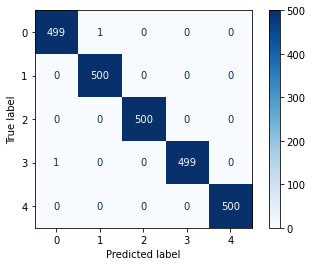

In [50]:
#create final model and evaluate 
B1()

In [ ]:
#function to import training data and split into training and validation set 
def import_X_Y():
    #import x
    x_train_not_split = import_x()
    #import y 
    y_train_not_split = import_labels()
    #plit data 
    x_train,x_test,y_train,y_test  = split_data(x_train_not_split,y_train_not_split)
    #retrun training and validation data
    return x_train,x_test,y_train,y_test

In [ ]:
# calling function to import data and make training and validation datasets 
x_train,x_test,y_train,y_test = import_X_Y()

# Cross Validation

In [15]:
# create dicotary to hold CV results 
CV_df = pd.DataFrame({"METHOD":[],"MEAN":[],"STD":[]})
#cross validation - split data into 10 graoups and repate 3 times 
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)     

In [16]:
#Logistic regression 
# create model
model = LogisticRegression()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dicoary of results 
CV_df_LR = {'Method':'Logistic regression','MEAN':scores.mean(),'STD':scores.std()}

In [17]:
# support vecotr machine 
#create model 
model = LinearSVC()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dictoary of results 
CV_df_SV = {'Method':'Support Vector','MEAN':scores.mean(),'STD':scores.std()}

In [18]:
#Decision  tree 
#create model 
model = DecisionTreeClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dicotary of results 
CV_df_DT = {'Method':'Decision Tree','MEAN':scores.mean(),'STD':scores.std()}

In [19]:
#Random Forest  
#creat model
model = RandomForestClassifier()
# evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#create dicotary of results 
CV_df_RF = {'Method':'Random Forest','MEAN':scores.mean(),'STD':scores.std()}

In [20]:
#K nearest Neighbours  
#creat model
model = KNeighborsClassifier()
#evaluate model
scores = cross_val_score(model, x_train, y_train, scoring='accuracy', cv=cv, n_jobs=-1)
#creaet dictoary of results 
CV_df_KN = {'Method':'K-Nearest Neighbors','MEAN':scores.mean(),'STD':scores.std()}

In [21]:
#compile dictoaries into one pandnas tabel
list_of_dict = CV_df_LR, CV_df_DT,CV_df_RF,CV_df_KN
# add list to pandas data frame 
df = pd.DataFrame(list_of_dict)
#print table of results 
df

# Hyperparameter 

In [22]:

# Create the parameter grid based on the results of random search 
param_grid = {'C': [0.1,1, 10, 100]}

# Create a based model
sv =LinearSVC()
# iterate through all the C values 3 times 
grid_search = GridSearchCV(estimator = sv, param_grid = param_grid, cv = 3, n_jobs = -1, verbose = 2)

In [23]:
# Fit the grid search to the data
grid_search.fit(x_train, y_train)
#find best parameters 
grid_search.best_params_
best_grid = grid_search.best_estimator_

In [24]:
#print best parameters 
best_grid

# Making hyperparameter boxlplot

In [25]:
# result of CV into tabel 
# compile results into pandas table 
results_df = pd.DataFrame(grid_search.cv_results_)
# sort by best test score 
results_df = results_df.sort_values(by=["rank_test_score"])
# compine results to find averages 
results_df = results_df.set_index(results_df["params"].apply(lambda x: "_".join(str(val) for val in x.values()))).rename_axis("kernel")
# add columns for the mean/ standard deviation to table 
results_df[["params", "rank_test_score", "mean_test_score", "std_test_score"]]

In [26]:
# extract paramets and test scores 
r_df = results_df[['param_C','split0_test_score','split1_test_score' , 'split2_test_score']]

In [27]:
# plot test scores 
df = r_df.set_index('param_C')
df.T.boxplot()

# Learning rate graph 

In [28]:
#create data for all the iteration needed for the learning rate graph 
pipeline = make_pipeline(LinearSVC(C=1))
#create parameters to measure and vary #
train_sizes, train_scores, test_scores = learning_curve(estimator=pipeline, X=x_train_not_split, y=y_train_not_split,cv=10, train_sizes=np.linspace(0.1, 1.0, 10),n_jobs=1)

In [29]:
# calculates points for plot 
#calcuate training plots 
train_mean = np.mean(train_scores, axis=1)
train_std = np.std(train_scores, axis=1)
#calculates validation set plot points 
test_mean = np.mean(test_scores, axis=1)
test_std = np.std(test_scores, axis=1)

In [30]:
#create learning plot 
#create plot for the training data against training size 
plt.plot(train_sizes, train_mean, color='blue', marker='o', markersize=5, label='Training Accuracy')
#fill with blue to show standard deviation 
plt.fill_between(train_sizes, train_mean + train_std, train_mean - train_std, alpha=0.15, color='blue')
#creat eplot for valiation data 
plt.plot(train_sizes, test_mean, color='green', marker='+', markersize=5, linestyle='--', label='Validation Accuracy')
#fill standard divation in green 
plt.fill_between(train_sizes, test_mean + test_std, test_mean - test_std, alpha=0.15, color='green')
#title and axis label the groah 
plt.title('Learning Curve')
plt.xlabel('Training Data Size')
plt.ylabel('Model accuracy')
plt.grid()
#create legend for colours 
plt.legend(loc='lower right')
#show graph 
plt.show()